 ## Loading Necessary Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Loading Data from csv Dataset

In [114]:
data = pd.read_csv("data/synthetic_asthma_dataset.csv")
data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [115]:
data.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [116]:
data.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

#### Filling in Missing Values with Mode

In [117]:
data['Asthma_Control_Level'] = data['Asthma_Control_Level'].fillna(data['Asthma_Control_Level'].mode()[0])
data['Allergies'] = data['Allergies'].fillna( data['Allergies'].mode()[0])
data['Comorbidities'] = data['Comorbidities'].fillna(data['Comorbidities'].mode()[0])
data.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
BMI                        0
Smoking_Status             0
Family_History             0
Allergies                  0
Air_Pollution_Level        0
Physical_Activity_Level    0
Occupation_Type            0
Comorbidities              0
Medication_Adherence       0
Number_of_ER_Visits        0
Peak_Expiratory_Flow       0
FeNO_Level                 0
Has_Asthma                 0
Asthma_Control_Level       0
dtype: int64

In [118]:
data.dtypes

Patient_ID                  object
Age                          int64
Gender                      object
BMI                        float64
Smoking_Status              object
Family_History               int64
Allergies                   object
Air_Pollution_Level         object
Physical_Activity_Level     object
Occupation_Type             object
Comorbidities               object
Medication_Adherence       float64
Number_of_ER_Visits          int64
Peak_Expiratory_Flow       float64
FeNO_Level                 float64
Has_Asthma                   int64
Asthma_Control_Level        object
dtype: object

In [119]:
data.drop(columns=["Patient_ID"], inplace=True)

## Correlation calculation among all numerical features.

### selecting columns with numerical features

In [120]:
num_data = data.select_dtypes(include=np.number)
num_data.head()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,27.6,1,0.38,0,421.0,46.0,0
1,15,24.6,0,0.60,2,297.6,22.9,0
2,72,17.6,0,0.38,0,303.3,15.3,0
3,61,16.8,0,0.60,1,438.0,40.1,1
4,21,30.2,0,0.82,3,535.0,27.7,0


### Correlation Matrix for numerical features

In [121]:
corr1 = num_data.corr()
corr1

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
Age,1.000000,-0.010078,0.007481,-0.005332,-0.014775,0.012447,0.012180,-0.004346
BMI,-0.010078,1.000000,-0.001244,-0.001318,0.003024,-0.000559,-0.005137,0.098425
Family_History,0.007481,-0.001244,1.000000,0.019463,0.020411,-0.009463,0.005389,0.409531
Medication_Adherence,-0.005332,-0.001318,0.019463,1.000000,-0.001243,-0.012747,0.019040,0.003785
Number_of_ER_Visits,-0.014775,0.003024,0.020411,-0.001243,1.000000,0.001293,0.009969,0.005781
Peak_Expiratory_Flow,0.012447,-0.000559,-0.009463,-0.012747,0.001293,1.000000,0.000575,-0.005207
FeNO_Level,0.012180,-0.005137,0.005389,0.019040,0.009969,0.000575,1.000000,0.007012
Has_Asthma,-0.004346,0.098425,0.409531,0.003785,0.005781,-0.005207,0.007012,1.000000


### Correlation matrix on heatmap

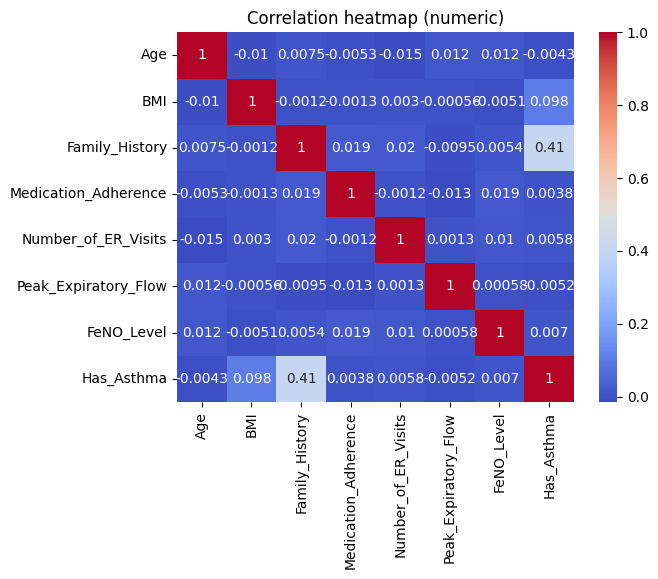

In [122]:
sb.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (numeric)")
plt.show()

## Visualizing the dataset

### impact of Peak Expiratory flow to asthma vs. non-asthma groups broken down by Gender

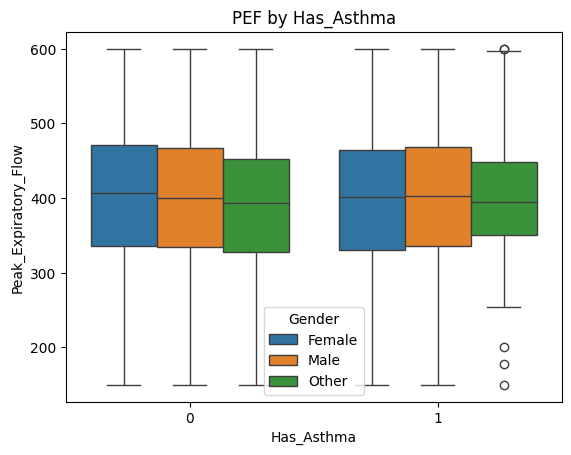

In [123]:
sb.boxplot(x="Has_Asthma", y="Peak_Expiratory_Flow", hue="Gender", data=data)
plt.title("PEF by Has_Asthma")
plt.show()

### Age, BMI  by Asthma status

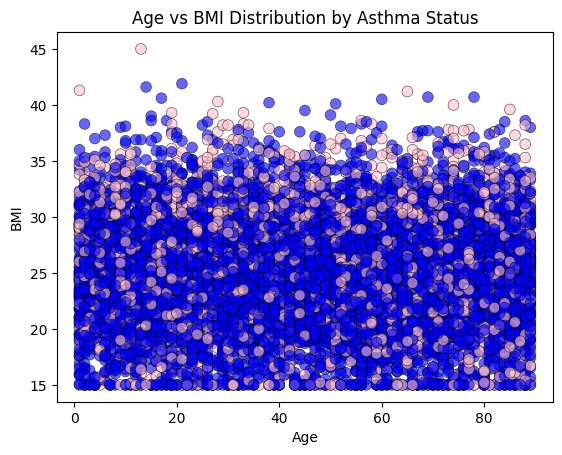

In [124]:
colors = ['blue' if x == 0 else 'pink' for x in data['Has_Asthma']]
plt.scatter(data["Age"] , data['BMI'], c= colors, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
plt.title('Age vs BMI Distribution by Asthma Status')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [125]:
data["Has_Asthma"].value_counts()

Has_Asthma
0    7567
1    2433
Name: count, dtype: int64

### compare Total count of Asthma vs non-Asthma Group

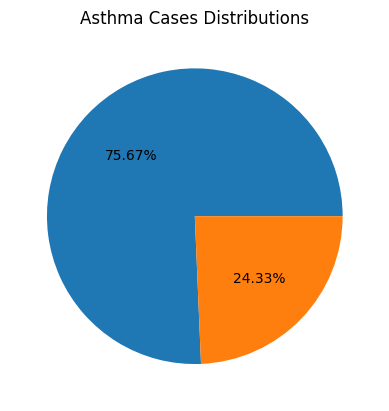

In [126]:
asthma_count = data["Has_Asthma"].value_counts()
plt.pie(asthma_count, autopct="%1.2f%%")
plt.title("Asthma Cases Distributions")
plt.show()

### Plot to Compare Smoking Status vs Has Asthma Status

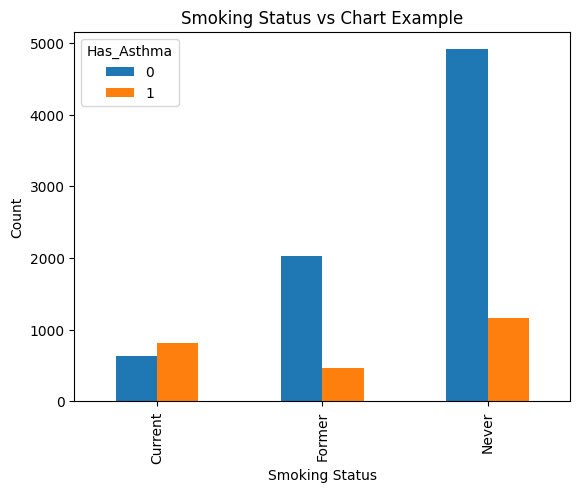

In [127]:
pd.crosstab(data["Smoking_Status"], data["Has_Asthma"]).plot(kind='bar',stacked=False)
plt.title("Smoking Status vs Chart Example")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.show()

## Partitioning the Dataset

#### Droping the Has Asthma from dataset

In [128]:
X = data.drop(columns=["Has_Asthma"])
print(f"\n Features of the dataset\n {X.head()}")


 Features of the dataset
    Age  Gender   BMI Smoking_Status  Family_History Allergies  \
0   52  Female  27.6         Former               1      Dust   
1   15    Male  24.6         Former               0      Dust   
2   72  Female  17.6          Never               0      Dust   
3   61    Male  16.8          Never               0  Multiple   
4   21    Male  30.2          Never               0      Dust   

  Air_Pollution_Level Physical_Activity_Level Occupation_Type Comorbidities  \
0            Moderate               Sedentary         Outdoor      Diabetes   
1                 Low                Moderate          Indoor          Both   
2            Moderate                Moderate          Indoor      Diabetes   
3                High               Sedentary         Outdoor          Both   
4            Moderate                  Active          Indoor      Diabetes   

   Medication_Adherence  Number_of_ER_Visits  Peak_Expiratory_Flow  \
0                  0.38              

#### Creating target 

In [129]:
y = data["Has_Asthma"]
print(f"\n Target of the dataset \n {y.head()}")


 Target of the dataset 
 0    0
1    0
2    0
3    1
4    0
Name: Has_Asthma, dtype: int64


#### Split the features and target to train and test set

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 15)
(3000, 15)
(7000,)
(3000,)


In [131]:
modelOne  = DecisionTreeClassifier()
modelOne.fit(x_train, y_train)

ValueError: could not convert string to float: 'Male'